# Propriétés d'une population fictive de 900 personnes: analyse bivariée qualitative

Version du 5 avril 2024 — pas terminé, à reprendre, notamment la dernière partie

900 individus, cinq caractères: age, personnes dans le même foyer, fréquence de lecture du journal, orientation politique, revenu mensuel




## Importer les librairies nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

## Références bibliographiques

Référence:

* [Statistique descriptive bidimensionnelle](http://wikistat.fr/pdf/st-l-des-bi.pdf) (Site Wikistat)


Compléments:

* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Bennani: Bennani Dosse Mohammed, _Statistique bivariée avec R_, Rennes, PUR, 2011.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [2]:
### Lire le fichier corrigé manuellement – ne pas effacer !

path = 'data/observations_900.csv'

obs = pd.read_csv(path)
obs.set_index('id', inplace=True)
obs.head()

,age,gender,revenu_mensuel,lecture_journal,parti
id,,,,,
1,87,F,9410,trois-quatre fois par semaine,populiste
2,31,H,4466,de temps en temps,gauche
3,79,F,7515,trois-quatre fois par semaine,populiste
4,26,H,3376,le week-end,écologiste
5,75,F,3296,trois-quatre fois par semaine,gauche


In [3]:
## Nombre de lignes et de colonnes du tableau
obs.shape

# (900	5)

(900, 5)

In [4]:
# Informations détaillées
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 1 to 900
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              900 non-null    int64 
 1   gender           900 non-null    object
 2   revenu_mensuel   900 non-null    int64 
 3   lecture_journal  900 non-null    object
 4   parti            900 non-null    object
dtypes: int64(2), object(3)
memory usage: 42.2+ KB


# Variable qualitative et quantitative

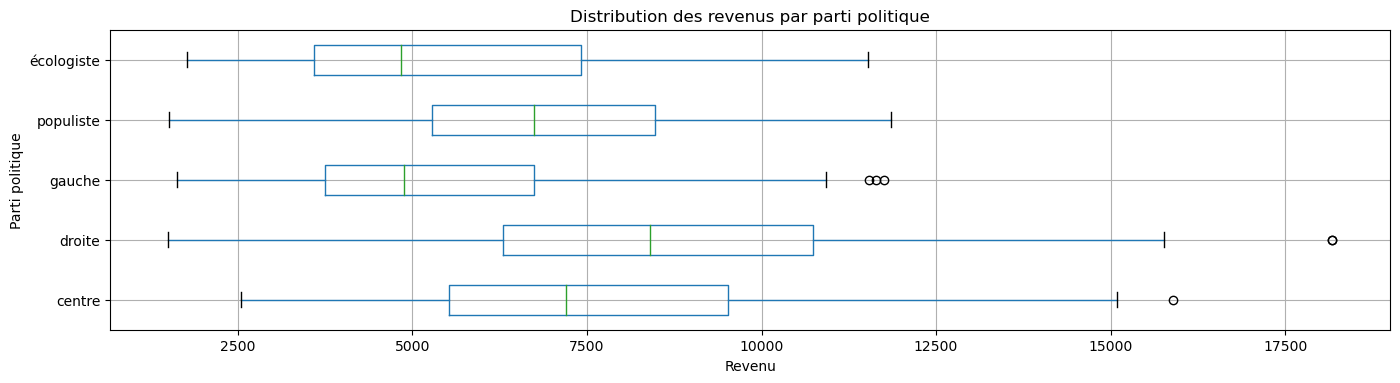

In [5]:
axes = obs[obs['revenu_mensuel'] < 20000].boxplot(column=['revenu_mensuel'],by=['parti'], vert=False, figsize=(16,4), )

fig = axes.get_figure()

fig.suptitle('')
    
axes.set_title('Distribution des revenus par parti politique')

axes.set_xlabel('Revenu')
axes.set_ylabel('Parti politique')

plt.show()


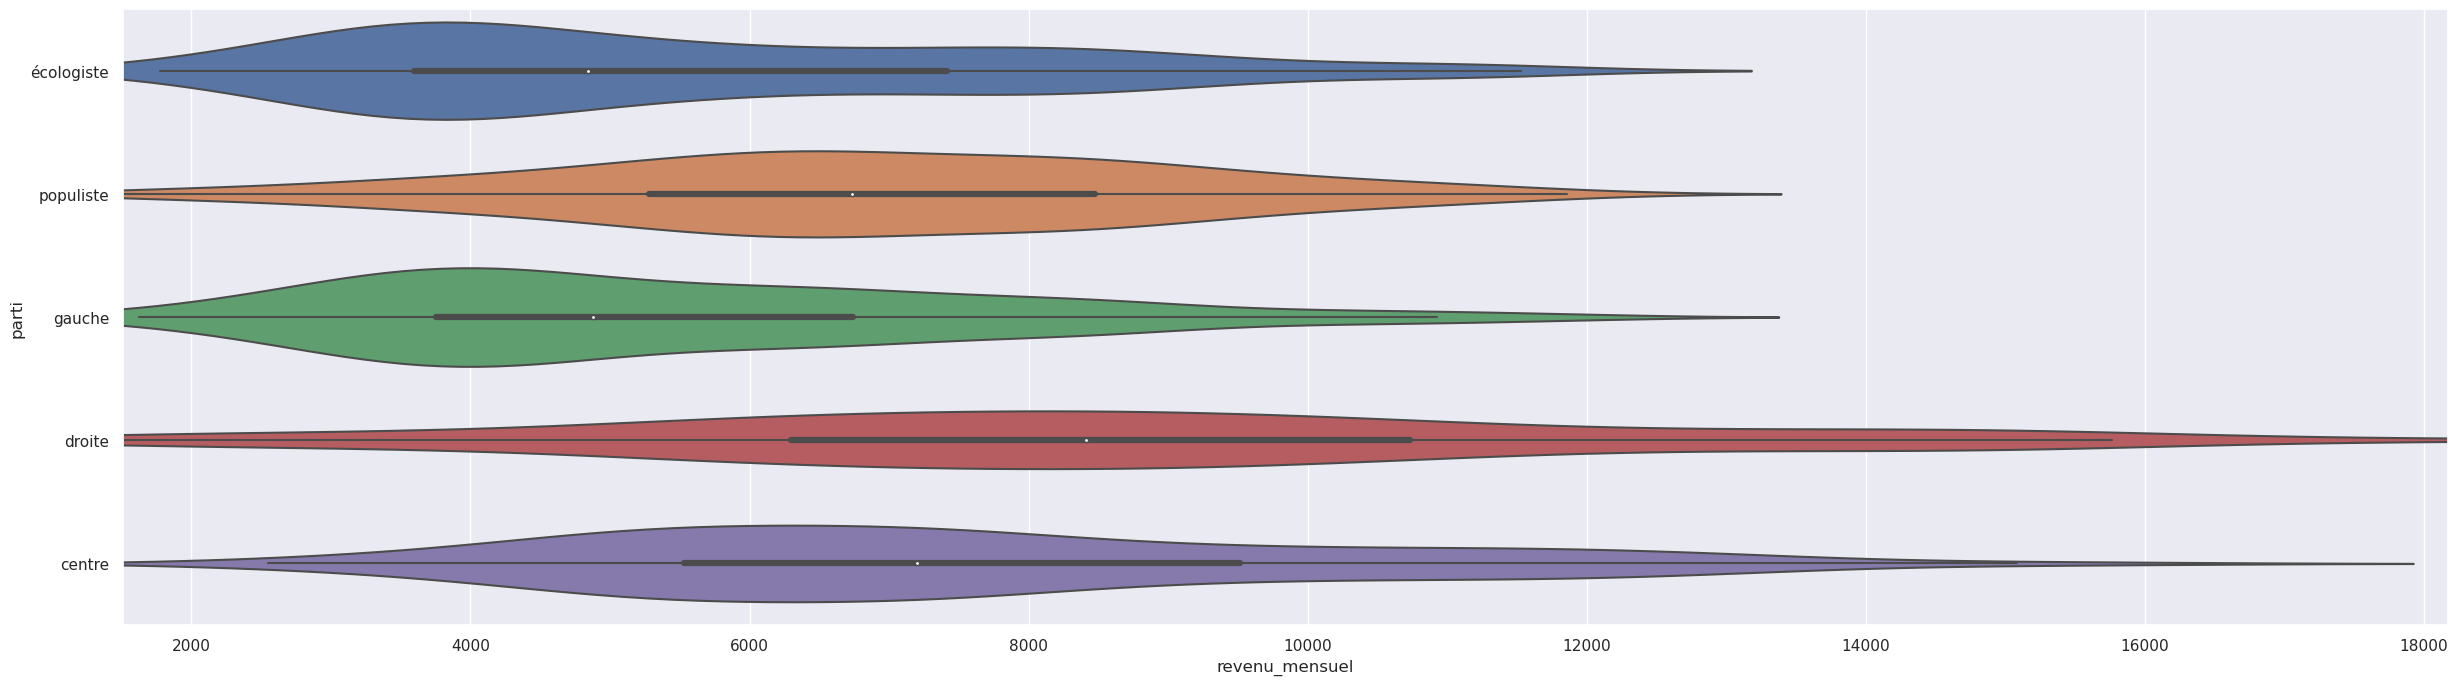

In [6]:
sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

d = obs[obs['revenu_mensuel'] < 20000]

ax = sns.violinplot(x='revenu_mensuel', y ='parti', data = d.sort_values('parti',ascending=False))

### Noter que au delà des limites les valeurs sont coupées car postulées
ax.set_xlim(left=min(d['revenu_mensuel']), right=max(d['revenu_mensuel']))

plt.show()

In [7]:
obs[obs['parti'] == 'populiste']['revenu_mensuel'].describe()

count      199.000000
mean      6870.532663
std       2211.244432
min       1509.000000
25%       5277.000000
50%       6736.000000
75%       8476.000000
max      11858.000000
Name: revenu_mensuel, dtype: float64

# Deux variables qualitatives



Documentation:
* Hamon (cit.), Chapitre 4, 99-111.
* Bennani (cit.), Chapitre 2, 23-35.


In [8]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec un découpage significatif au point de vue heuristique, et modifiable si besion
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

generations = [18, 26, 36, 46, 56, 66, 91]
c_obs = obs.copy(deep=True)
c_obs['generation'] = pd.cut(c_obs['age'], generations, right=False)
# Inspection
c_obs.head()

,age,gender,revenu_mensuel,lecture_journal,parti,generation
id,,,,,,
1,87,F,9410,trois-quatre fois par semaine,populiste,"[66, 91)"
2,31,H,4466,de temps en temps,gauche,"[26, 36)"
3,79,F,7515,trois-quatre fois par semaine,populiste,"[66, 91)"
4,26,H,3376,le week-end,écologiste,"[26, 36)"
5,75,F,3296,trois-quatre fois par semaine,gauche,"[66, 91)"


In [9]:
type(c_obs.loc[1]['generation'])

pandas._libs.interval.Interval

In [10]:
### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses

c_obs['generation'] = c_obs['generation'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))
c_obs.head()

,age,gender,revenu_mensuel,lecture_journal,parti,generation
id,,,,,,
1,87,F,9410,trois-quatre fois par semaine,populiste,66-90
2,31,H,4466,de temps en temps,gauche,26-35
3,79,F,7515,trois-quatre fois par semaine,populiste,66-90
4,26,H,3376,le week-end,écologiste,26-35
5,75,F,3296,trois-quatre fois par semaine,gauche,66-90


In [11]:
type(c_obs.loc[1]['generation'])

str

## Age et orientation politique

### Tableau de contingence

In [12]:
### La fonction pivot_table produit un tableau de contingence
## Au centre du tableau se trouvent les effectifs conjoints, 
## aux bords les effectifs marginaux qui correspondent 
## aux distributions indépendantes des variables

X = "parti"  # "0"
Y = "generation"

c_obs_parti_generation = c_obs[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
c_obs_parti_generation

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,16,17,22,22,33,110
26-35,18,22,22,31,36,129
36-45,20,21,18,17,18,94
46-55,31,15,21,32,32,131
56-65,20,24,24,19,36,123
66-90,57,55,62,78,61,313
Total,162,154,169,199,216,900


In [13]:
### Fréquence conjointe et fréquence marginale (proportion par rapport au total)

c_obs_parti_generation_frequence = np.round(c_obs_parti_generation*100/c_obs_parti_generation.iloc[-1,-1],1)
c_obs_parti_generation_frequence

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,1.8,1.9,2.4,2.4,3.7,12.2
26-35,2.0,2.4,2.4,3.4,4.0,14.3
36-45,2.2,2.3,2.0,1.9,2.0,10.4
46-55,3.4,1.7,2.3,3.6,3.6,14.6
56-65,2.2,2.7,2.7,2.1,4.0,13.7
66-90,6.3,6.1,6.9,8.7,6.8,34.8
Total,18.0,17.1,18.8,22.1,24.0,100.0


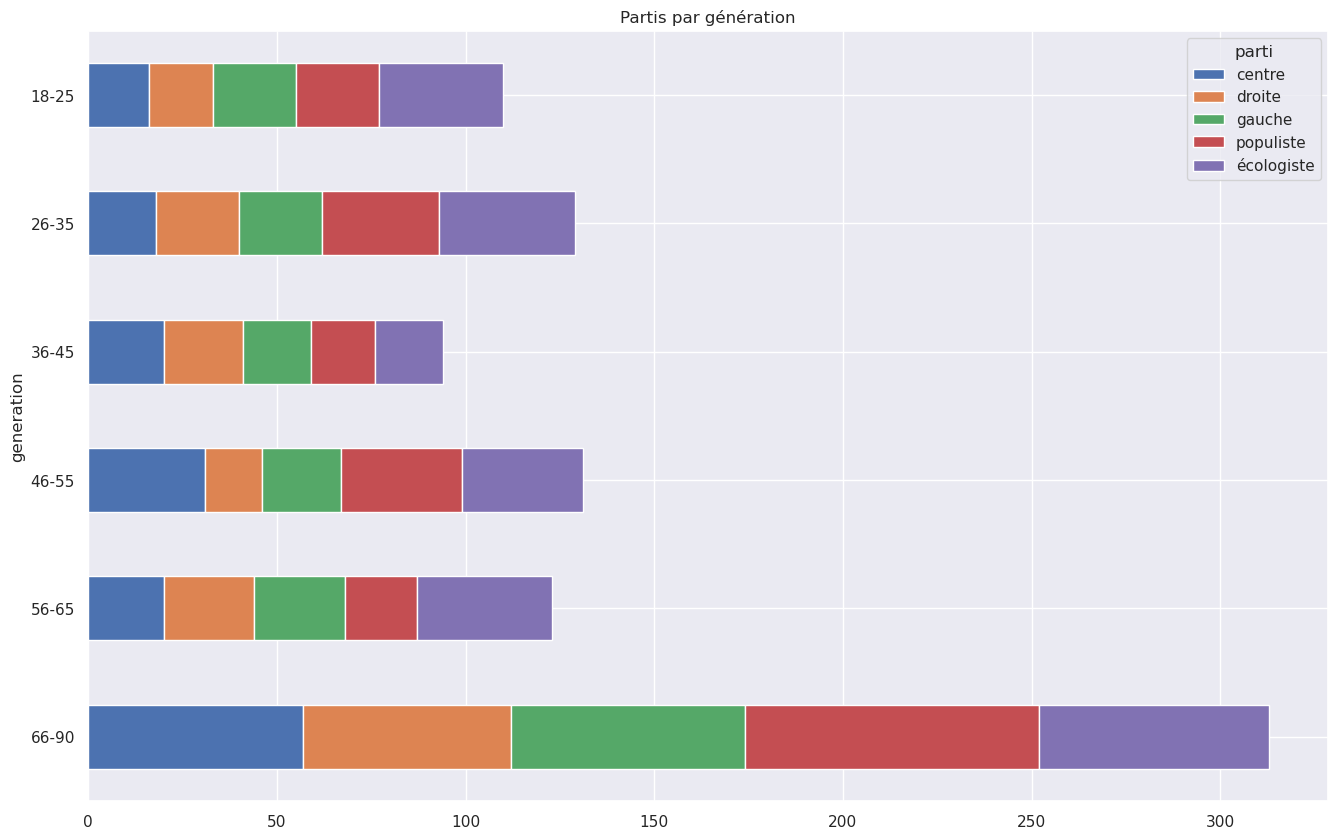

In [14]:
### Effectifs des partis par génération
g = c_obs_parti_generation.iloc[:-1, :-1].sort_index(ascending=False)\
        .plot( kind='barh', stacked=True,  figsize=(16,10),  title = 'Partis par génération')

In [15]:
### pourcentages des lignes
stacked_data_lignes = c_obs_parti_generation.apply(lambda x: (x*100/sum(x)*2).round(2), axis=1) # axis=0
stacked_data_lignes

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,14.55,15.45,20.00,20.00,30.00,100.0
26-35,13.95,17.05,17.05,24.03,27.91,100.0
36-45,21.28,22.34,19.15,18.09,19.15,100.0
46-55,23.66,11.45,16.03,24.43,24.43,100.0
56-65,16.26,19.51,19.51,15.45,29.27,100.0
66-90,18.21,17.57,19.81,24.92,19.49,100.0
Total,18.00,17.11,18.78,22.11,24.00,100.0


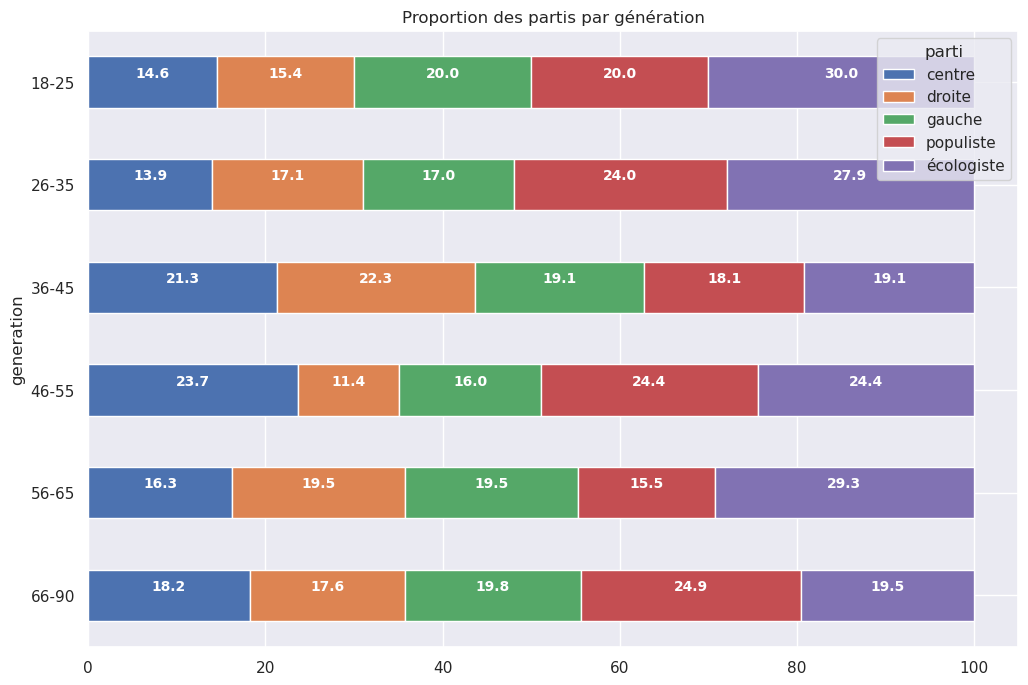

In [16]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

z = stacked_data_lignes.iloc[:-1, :-1].sort_index(ascending=False).plot(kind="barh", stacked=True, figsize=(12,8), title='Proportion des partis par génération')

### https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
#b = [(p.get_bbox().bounds, p.get_bbox().xmin,p.get_bbox().ymin, p.get_bbox().ymax, p.get_width(), p.get_y(), p.get_height()) for p in z.patches][59]
#print(b)
for p in z.patches:
    b = p.get_bbox()
    y_value=b.y1-b.y0
    z.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

In [17]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des colonnes (ou des lignes après avoir interverti les variables dans le tableau)
# axis=0 à la place de axis=1
stacked_data_cols = c_obs_parti_generation.apply(lambda x: round(x*100/sum(x)*2, 2), axis=0) 
stacked_data_cols

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,9.88,11.04,13.02,11.06,15.28,12.22
26-35,11.11,14.29,13.02,15.58,16.67,14.33
36-45,12.35,13.64,10.65,8.54,8.33,10.44
46-55,19.14,9.74,12.43,16.08,14.81,14.56
56-65,12.35,15.58,14.20,9.55,16.67,13.67
66-90,35.19,35.71,36.69,39.20,28.24,34.78
Total,100.00,100.00,100.00,100.00,100.00,100.00


In [18]:
### Ajouter des valeurs pour le tri des colonnes
stacked_data_cols.loc['sort_index'] = [3,4,2,5,1,None]
stacked_data_cols

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,9.88,11.04,13.02,11.06,15.28,12.22
26-35,11.11,14.29,13.02,15.58,16.67,14.33
36-45,12.35,13.64,10.65,8.54,8.33,10.44
46-55,19.14,9.74,12.43,16.08,14.81,14.56
56-65,12.35,15.58,14.20,9.55,16.67,13.67
66-90,35.19,35.71,36.69,39.20,28.24,34.78
Total,100.00,100.00,100.00,100.00,100.00,100.00
sort_index,3.00,4.00,2.00,5.00,1.00,NaN


In [19]:
### Interchanger les lignes avec les colonnes (=transposer) 
#  afin d'utiliser le même affichage en diagramme à barres
ts_stacked_data_cols = stacked_data_cols.transpose().sort_values(by='sort_index')
ts_stacked_data_cols

generation,18-25,26-35,36-45,46-55,56-65,66-90,Total,sort_index
parti,,,,,,,,
écologiste,15.28,16.67,8.33,14.81,16.67,28.24,100.0,1.0
gauche,13.02,13.02,10.65,12.43,14.20,36.69,100.0,2.0
centre,9.88,11.11,12.35,19.14,12.35,35.19,100.0,3.0
droite,11.04,14.29,13.64,9.74,15.58,35.71,100.0,4.0
populiste,11.06,15.58,8.54,16.08,9.55,39.20,100.0,5.0
Total,12.22,14.33,10.44,14.56,13.67,34.78,100.0,NaN


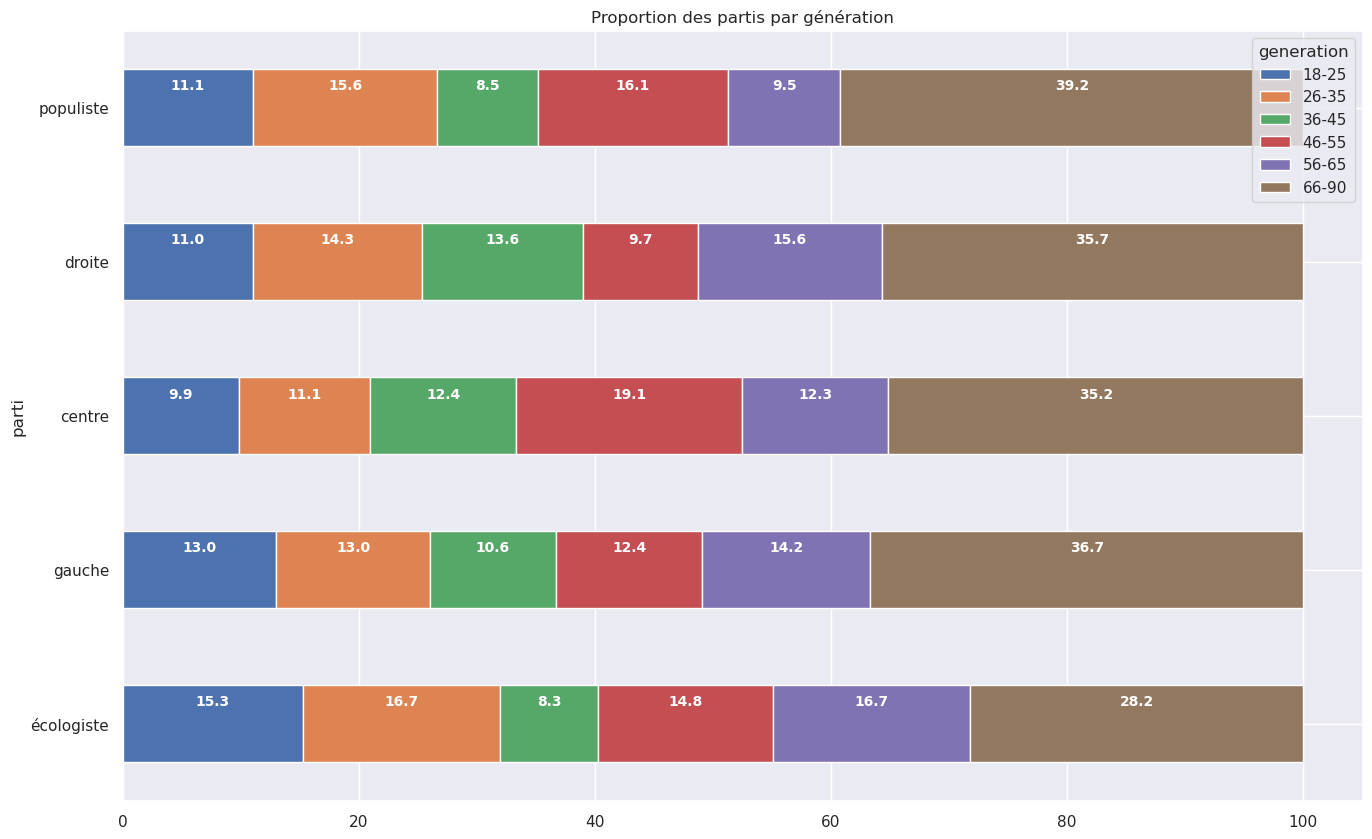

In [20]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

z = ts_stacked_data_cols.iloc[:-1, :-2].plot(kind="barh", stacked=True, figsize=(16,10), title='Proportion des partis par génération')

### https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
#b = [(p.get_bbox().bounds, p.get_bbox().xmin,p.get_bbox().ymin, p.get_bbox().ymax, p.get_width(), p.get_y(), p.get_height()) for p in z.patches][59]
#print(b)
for p in z.patches:
    b = p.get_bbox()
    y_value=b.y1-b.y0
    z.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

### Tableau théorique en cas d'indépendance

Produit des marges divisé par le total et arrondi

In [21]:
### Total général, dernière cellule de la dernière ligne
c_obs_parti_generation.iat[-1,-1]

900

In [22]:
tx = c_obs_parti_generation.loc[:,["Total"]]
ty = c_obs_parti_generation.loc[["Total"],:]
n = c_obs_parti_generation.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Non arrondi
print(indep)

print('\n--------------------------\n')
# Arrondi
print(indep.round(0).astype(int))



parti       centre      droite      gauche   populiste  écologiste  Total
generation                                                               
18-25        19.80   18.822222   20.655556   24.322222       26.40  110.0
26-35        23.22   22.073333   24.223333   28.523333       30.96  129.0
36-45        16.92   16.084444   17.651111   20.784444       22.56   94.0
46-55        23.58   22.415556   24.598889   28.965556       31.44  131.0
56-65        22.14   21.046667   23.096667   27.196667       29.52  123.0
66-90        56.34   53.557778   58.774444   69.207778       75.12  313.0
Total       162.00  154.000000  169.000000  199.000000      216.00  900.0

--------------------------

parti       centre  droite  gauche  populiste  écologiste  Total
generation                                                      
18-25           20      19      21         24          26    110
26-35           23      22      24         29          31    129
36-45           17      16      18         21

In [23]:
### Différence en effectifs entre le théorique et l'observé
#  Valeurs arrondies
### Doc. :
#   Bennani, p.30
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (c_obs_parti_generation-indep).iloc[:-1,:-1]
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.round(0).astype(int))


parti       centre  droite  gauche  populiste  écologiste
generation                                               
18-25           -4      -2       1         -2           7
26-35           -5       0      -2          2           5
36-45            3       5       0         -4          -5
46-55            7      -7      -4          3           1
56-65           -2       3       1         -8           6
66-90            1       1       3          9         -14


In [24]:
ecarts_sign = ecarts.applymap(sign)
ecarts_sign

NameError: name 'sign' is not defined

In [ ]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#   Bennani, p.31
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = round((c_obs_parti_generation-indep)**2/indep,2)
ecarts_ponderes.iloc[:-1,:-1]


parti,centre,droite,gauche,populiste,écologiste
generation,,,,,
"[18, 26)",0.73,0.18,0.09,0.22,1.65
"[26, 36)",1.17,0.00,0.20,0.22,0.82
"[36, 46)",0.56,1.50,0.01,0.69,0.92
"[46, 56)",2.47,3.06,0.48,0.37,0.02
"[56, 66)",0.21,0.41,0.04,2.47,1.42
"[66, 91)",0.00,0.10,0.16,1.06,2.74


In [ ]:
ecarts_ponderes_sign = ecarts_ponderes.iloc[:-1,:-1] * ecarts_sign
ecarts_ponderes_sign

parti,centre,droite,gauche,populiste,écologiste
generation,,,,,
"[18, 26)",-0.73,-0.18,0.09,-0.22,1.65
"[26, 36)",-1.17,-0.00,-0.20,0.22,0.82
"[36, 46)",0.56,1.50,0.01,-0.69,-0.92
"[46, 56)",2.47,-3.06,-0.48,0.37,0.02
"[56, 66)",-0.21,0.41,0.04,-2.47,1.42
"[66, 91)",0.00,0.10,0.16,1.06,-2.74


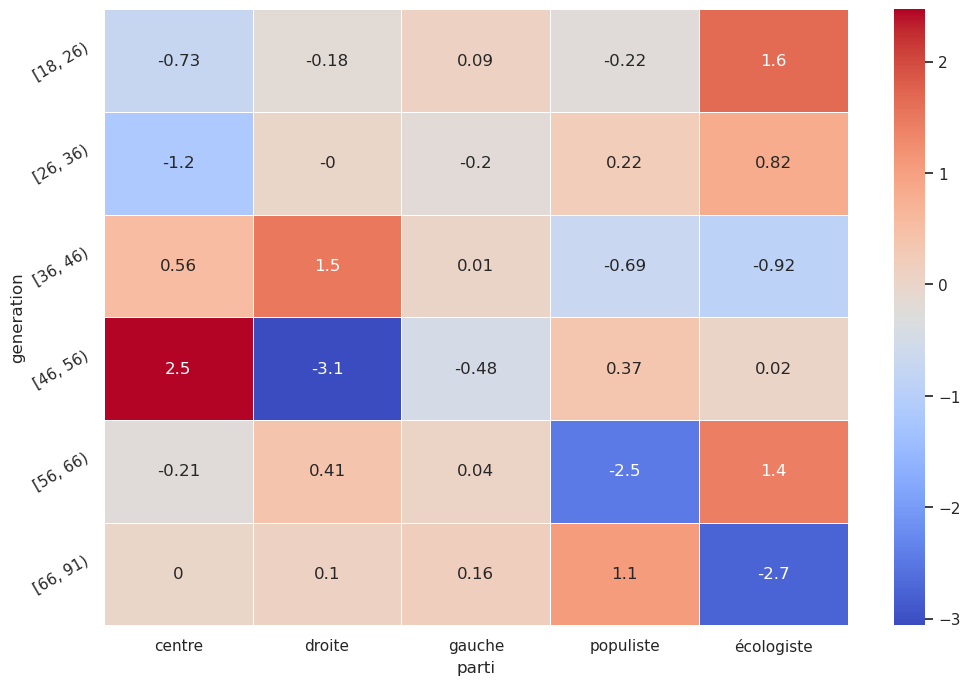

In [ ]:
### Écart pondérés
tableau = ecarts_ponderes_sign

fig, ax = plt.subplots(figsize=(12,8))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()

In [ ]:
### Degrés d'indépendance
(len(ecarts_ponderes)-1) * (len(ecarts_ponderes.columns)-1), len(ecarts_ponderes)-1,len(ecarts_ponderes.columns)-1

In [ ]:
colonnes = ecarts_ponderes.sum()
print(colonnes)

parti
centre        5.14
droite        5.25
gauche        0.98
populiste     5.03
écologiste    7.57
Total         0.00
dtype: float64


In [ ]:
chi_2 = ecarts_ponderes.sum().sum()
print(round(chi_2, 2))

23.97


In [ ]:
statistic, p, dof, expected = stats.chi2_contingency(c_obs_parti_generation)

print(statistic, p, dof)

dfe = round(pd.DataFrame(expected),1)
dfe

23.94913667240283 0.7743209212857227 30


,0,1,2,3,4,5
0,19.8,18.8,20.7,24.3,26.4,110.0
1,23.2,22.1,24.2,28.5,31.0,129.0
2,16.9,16.1,17.7,20.8,22.6,94.0
3,23.4,22.2,24.4,28.7,31.2,130.0
4,22.1,21.0,23.1,27.2,29.5,123.0
5,56.5,53.7,59.0,69.4,75.4,314.0
6,162.0,154.0,169.0,199.0,216.0,900.0


### Rejet de l'hypothèse d'indépendance ?

L'hypothèse H0 est celle de l'indépendace des variables

* valeur critique pour 20 degrés de liberté, à 5 % (= 0.05), Bennani, p.277, tableau D2 = __31.41__
   * cf. https://fr.wikipedia.org/wiki/Loi_du_%CF%87%C2%B2
   *  https://www.statology.org/chi-square-distribution-table/
 
 
* chi-2 mesuré = __23.97__

* P-value:  0.002749 (cf. https://www.statology.org/chi-square-p-value-calculator/)


Le chi-2 est donc inférieur à la valeur critique à 5 % d'erreur, donc H0 (hypothèse d'indépendance) ne peut pas être rejetée. Il n'y aurait pas de lien entre âge et orientation politique en général. 

On remarque des spécificités intéressantes pour certaines classes d'âge, par ex. les 26-35 ans ont une préférence pour l'orientation écologiste


In [ ]:
### Coéfficient de Cramer
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

## Le résultat montre un certain lien entre les variables, mais plutôt faible,
# le coééficient V de Cramer se situant entre 0 (absence d'association) et 1 (association parfaite),
# cf. Bennani, 36-37.
# Noter que les effectifs de certaines paries de valeurs 
# sont probablement insuffisant pour que ces tests soient valides, cf. Bennani, p. 38
stats.contingency.association(c_obs_parti_generation.iloc[:-1,:-1], method='cramer')

0.08156309192616683

In [ ]:
### Tables des proportions de contributions au chi-2
# cf. Benani, p.35

table = ecarts_ponderes.iloc[:-1,:-1]/chi_2
table['total'] = table.sum(axis=1)
table.loc['total'] = table.sum(axis=0)
table

parti,centre,droite,gauche,populiste,écologiste,total
generation,,,,,,
"[18, 26)",0.030455,0.007509,0.003755,0.009178,0.068836,0.119733
"[26, 36)",0.048811,0.000000,0.008344,0.009178,0.034209,0.100542
"[36, 46)",0.023363,0.062578,0.000417,0.028786,0.038381,0.153525
"[46, 56)",0.103045,0.127660,0.020025,0.015436,0.000834,0.267000
"[56, 66)",0.008761,0.017105,0.001669,0.103045,0.059241,0.189821
"[66, 91)",0.000000,0.004172,0.006675,0.044222,0.114310,0.169378
total,0.214435,0.219024,0.040884,0.209846,0.315811,1.000000


In [ ]:
### % plus lisibles
rt = round(table*100,2)
rt

parti,centre,droite,gauche,populiste,écologiste,total
generation,,,,,,
"[18, 26)",3.05,0.75,0.38,0.92,6.88,11.97
"[26, 36)",4.88,0.00,0.83,0.92,3.42,10.05
"[36, 46)",2.34,6.26,0.04,2.88,3.84,15.35
"[46, 56)",10.30,12.77,2.00,1.54,0.08,26.70
"[56, 66)",0.88,1.71,0.17,10.30,5.92,18.98
"[66, 91)",0.00,0.42,0.67,4.42,11.43,16.94
total,21.44,21.90,4.09,20.98,31.58,100.00


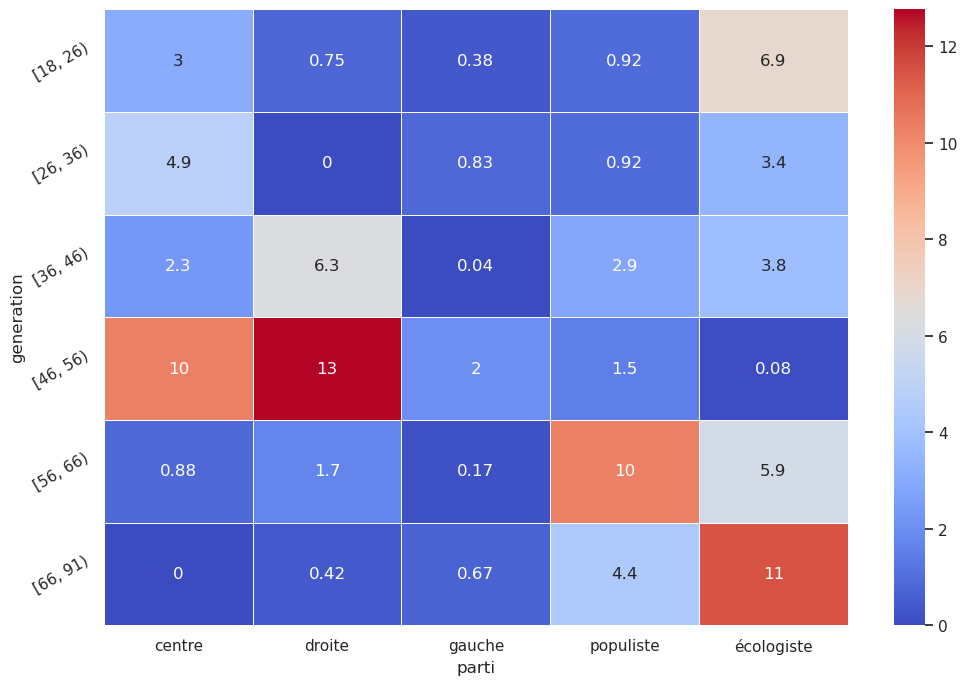

In [ ]:
### Proportion des contributions au chi-2
tableau = rt.iloc[:-1,:-1]

fig, ax = plt.subplots(figsize=(12,8))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()

## Genre et orientation politique

In [26]:
X = "gender"
Y = "parti"  # "0"

c_obs_parti_genre = c_obs[[Y,X]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int) 
c_obs_parti_genre

parti,centre,droite,gauche,populiste,écologiste,Total
gender,,,,,,
F,88,59,114,97,138,496
H,74,95,55,102,78,404
Total,162,154,169,199,216,900


#### Calcul de la différence à l'indépendance

In [27]:
tx = c_obs_parti_genre.loc[:,["Total"]]
ty = c_obs_parti_genre.loc[["Total"],:]
n = c_obs_parti_genre.iat[-1,-1]   # .iloc[:-1,:-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
display(indep.astype(int))


parti,centre,droite,gauche,populiste,écologiste,Total
gender,,,,,,
F,89,84,93,109,119,496
H,72,69,75,89,96,404
Total,162,154,169,199,216,900


In [28]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (c_obs_parti_genre-indep)
## Attention : arrondi aux entiers dans l'affichage
display(ecarts.iloc[:-1,:-1].astype(int))


parti,centre,droite,gauche,populiste,écologiste
gender,,,,,
F,-1,-25,20,-12,18
H,1,25,-20,12,-18


In [29]:
def sign(val):
    
    if val > 0:
        a = 1
    elif val < 0:
        a = -1
    else:
        a = 0    
    return a


sign(-3)

-1

In [30]:
ecarts_signe = ecarts.iloc[:-1,:-1].applymap(sign)
ecarts_signe

parti,centre,droite,gauche,populiste,écologiste
gender,,,,,
F,-1,-1,1,-1,1
H,1,1,-1,1,-1


In [31]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
#  le chi2 : (valeur observée - valeur attendue)²/valeur attendue
ecarts_ponderes = ((c_obs_parti_genre-indep)**2/indep).iloc[:-1,:-1]
ecarts_ponderes

parti,centre,droite,gauche,populiste,écologiste
gender,,,,,
F,0.018351,7.886245,4.672994,1.463987,3.019839
H,0.022530,9.682123,5.737142,1.797370,3.707525


In [32]:
ecarts_ponderes_signe = ecarts_ponderes * ecarts_signe
ecarts_ponderes_signe

parti,centre,droite,gauche,populiste,écologiste
gender,,,,,
F,-0.018351,-7.886245,4.672994,-1.463987,3.019839
H,0.022530,9.682123,-5.737142,1.797370,-3.707525


Chi carré : 38.008


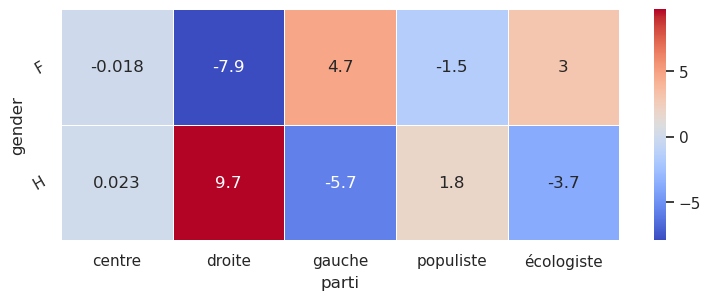

In [33]:
## Chi2 :somme des écarts pondérés

chi_2 = ecarts_ponderes.sum().sum() 
print('Chi carré :', round(chi_2,3))


fig, ax = plt.subplots(figsize=(9,3))         
# Sample figsize in inches
g = sns.heatmap(ecarts_ponderes_signe, annot=ecarts_ponderes_signe, cmap="coolwarm", linewidths=.5, ax=ax)
labels = ecarts_ponderes.index

p = g.set_yticklabels(labels, rotation=30)

In [34]:
### Degrés d'indépendance
print("Degrés d'indépendance :",(len(ecarts_ponderes_sign)-1) * (len(ecarts_ponderes_sign.columns)-1))

NameError: name 'ecarts_ponderes_sign' is not defined

In [35]:
statistic, p, dof, expected = stats.chi2_contingency(c_obs_parti_genre.iloc[:-1,:-1])

print(statistic, p, dof)

### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),1)
dfe

38.00810570059225 1.1162531734956683e-07 4


,0,1,2,3,4
0,89.3,84.9,93.1,109.7,119.0
1,72.7,69.1,75.9,89.3,97.0


In [36]:
### Probabilité de ce tromper si on rejette l'hypothèse d'indépendance:
# quasiment 0%
print("({0:.30f})".format(p))

(0.000000111625317349566825093278)


In [39]:
D = c_obs_parti_genre.iloc[:-1, :-1]
D

parti,centre,droite,gauche,populiste,écologiste
gender,,,,,
F,88,59,114,97,138
H,74,95,55,102,78


In [40]:
vc = stats.contingency.association(D, method='cramer')
print('Cramer: ', vc)

Cramer:  0.20550238090156914


### Test statistique: rejet de l'hypothèse d'indépendance ?

L'hypothèse d'indépendance H0 peut être rejetée:

* valeur critique pour 4 degrés de liberté, à 5 % (= 0.05), Bennani, p.277, tableau D2 = 9.488
   * cf. https://fr.wikipedia.org/wiki/Loi_du_%CF%87%C2%B2
   * https://fr.wikipedia.org/wiki/Test_du_%CF%87%C2%B2
   * [Test du khi-deux d'indépendance](https://www.jmp.com/fr_fr/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html)
   * https://www.statology.org/chi-square-distribution-table/
   * https://www.statology.org/chi-square-test-of-independence-python/
   
<br/>   

* chi-2 = 38.008

* P-value:  1.1162531734956683e-07 (cf. https://www.statology.org/chi-square-p-value-calculator/)

Le chi-2 est donc largement supérieur à la valeur critique à 5 % d'erreur, donc les variables ne sont pas indépendantes, H0 (hypothèse d'indépendance) peut être rejetée. Il y a un lien entre genre et orientation politique, par contre, avec un V de Cramer à 0.2, il n'est pas très fort.

On peut maintenant inspecter les spécificités:


In [41]:
### Tables des proportions de contributions au chi-2
# cf. Benani, p.35

table = ecarts_ponderes/chi_2
table['total'] = table.sum(axis=1)
table.loc['total'] = table.sum(axis=0)
table

parti,centre,droite,gauche,populiste,écologiste,total
gender,,,,,,
F,0.000483,0.207489,0.122947,0.038518,0.079452,0.448889
H,0.000593,0.254738,0.150945,0.047289,0.097546,0.551111
total,0.001076,0.462227,0.273893,0.085807,0.176998,1.000000


In [42]:
### % plus lisibles
rt = round(table*100,2)

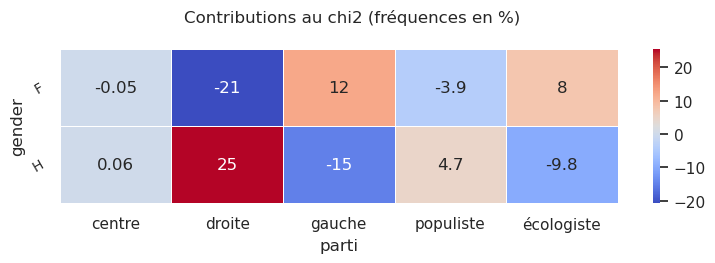

In [43]:
### Proportion des contributions au chi-2 avec signes

tableau = rt.iloc[:-1,:-1] * ecarts_signe

fig, ax = plt.subplots(figsize=(9,2))
fig.suptitle('Contributions au chi2 (fréquences en %)', y=1.08, x=0.45, size=12)
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax,)
labels = tableau.index
g.set_yticklabels(labels, rotation=30, size=10)

plt.savefig('graphics/contributions_chi2_genre_parti.jpg', bbox_inches='tight',
                       pad_inches=0.2)
plt.show()

## Orientation politique et fréquence de lecture du journal

In [44]:
X = "parti"  # "0"
Y = "lecture_journal"

c_obs_parti_lecture = c_obs[[Y,X]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int) 
c_obs_parti_lecture

lecture_journal,de temps en temps,le week-end,tous les jours,trois-quatre fois par semaine,très rarement,Total
parti,,,,,,
centre,22,42,51,33,14,162
droite,8,23,58,57,8,154
gauche,35,33,37,32,32,169
populiste,59,40,15,33,52,199
écologiste,14,71,71,41,19,216
Total,138,209,232,196,125,900


In [45]:
c_obs_parti_lecture = c_obs_parti_lecture[['très rarement', 'de temps en temps', 'le week-end', 'trois-quatre fois par semaine', 'tous les jours','Total']]
c_obs_parti_lecture

lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours,Total
parti,,,,,,
centre,14,22,42,33,51,162
droite,8,8,23,57,58,154
gauche,32,35,33,32,37,169
populiste,52,59,40,33,15,199
écologiste,19,14,71,41,71,216
Total,125,138,209,196,232,900


In [46]:
### Total général, dernière cellule de la dernière ligne
c_obs_parti_lecture.iat[-1,-1]

900

In [47]:
c_obs_parti_lecture.iloc[:-1,:-1]

lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours
parti,,,,,
centre,14,22,42,33,51
droite,8,8,23,57,58
gauche,32,35,33,32,37
populiste,52,59,40,33,15
écologiste,19,14,71,41,71


In [48]:
tx = c_obs_parti_lecture.loc[:,["Total"]]
ty = c_obs_parti_lecture.loc[["Total"],:]
n = c_obs_parti_lecture.iat[-1,-1]   # .iloc[:-1,:-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
display(indep.astype(int))


lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours,Total
parti,,,,,,
centre,22,24,37,35,41,162
droite,21,23,35,33,39,154
gauche,23,25,39,36,43,169
populiste,27,30,46,43,51,199
écologiste,30,33,50,47,55,216
Total,125,138,209,196,232,900


In [49]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (c_obs_parti_lecture-indep)
## Attention : arrondi aux entiers dans l'affichage
display(ecarts.iloc[:-1,:-1].astype(int))


lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours
parti,,,,,
centre,-8,-2,4,-2,9
droite,-13,-15,-12,23,18
gauche,8,9,-6,-4,-6
populiste,24,28,-6,-10,-36
écologiste,-11,-19,20,-6,15


In [50]:
def sign(val):
    
    if val > 0:
        a = 1
    elif val < 0:
        a = -1
    else:
        a = 0    
    return a


sign(-3)

-1

In [51]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (c_obs_parti_lecture-indep)
## Attention : arrondi aux entiers dans l'affichage
display(ecarts.iloc[:-1,:-1].astype(int))


lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours
parti,,,,,
centre,-8,-2,4,-2,9
droite,-13,-15,-12,23,18
gauche,8,9,-6,-4,-6
populiste,24,28,-6,-10,-36
écologiste,-11,-19,20,-6,15


In [52]:
ecarts_sign = ecarts.iloc[:-1,:-1].applymap(sign)
ecarts_sign

lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours
parti,,,,,
centre,-1,-1,1,-1,1
droite,-1,-1,-1,1,1
gauche,1,1,-1,-1,-1
populiste,1,1,-1,-1,-1
écologiste,-1,-1,1,-1,1


In [53]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
#  le chi2 : (valeur observée - valeur attendue)²/valeur attendue
ecarts_ponderes = ((c_obs_parti_lecture-indep)**2/indep).iloc[:-1,:-1]
ecarts_ponderes

lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours
parti,,,,,
centre,3.211111,0.324702,0.509952,0.147347,2.044483
droite,8.381097,10.323666,4.554368,16.413606,8.438038
gauche,3.098258,3.186294,0.993921,0.627171,0.989154
populiste,21.472055,26.594609,0.835097,2.465970,25.683933
écologiste,4.033333,11.037874,8.658405,0.775544,4.215201


In [54]:
ecarts_ponderes_sign = ecarts_ponderes * ecarts_sign
ecarts_ponderes_sign

lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours
parti,,,,,
centre,-3.211111,-0.324702,0.509952,-0.147347,2.044483
droite,-8.381097,-10.323666,-4.554368,16.413606,8.438038
gauche,3.098258,3.186294,-0.993921,-0.627171,-0.989154
populiste,21.472055,26.594609,-0.835097,-2.465970,-25.683933
écologiste,-4.033333,-11.037874,8.658405,-0.775544,4.215201


169.015


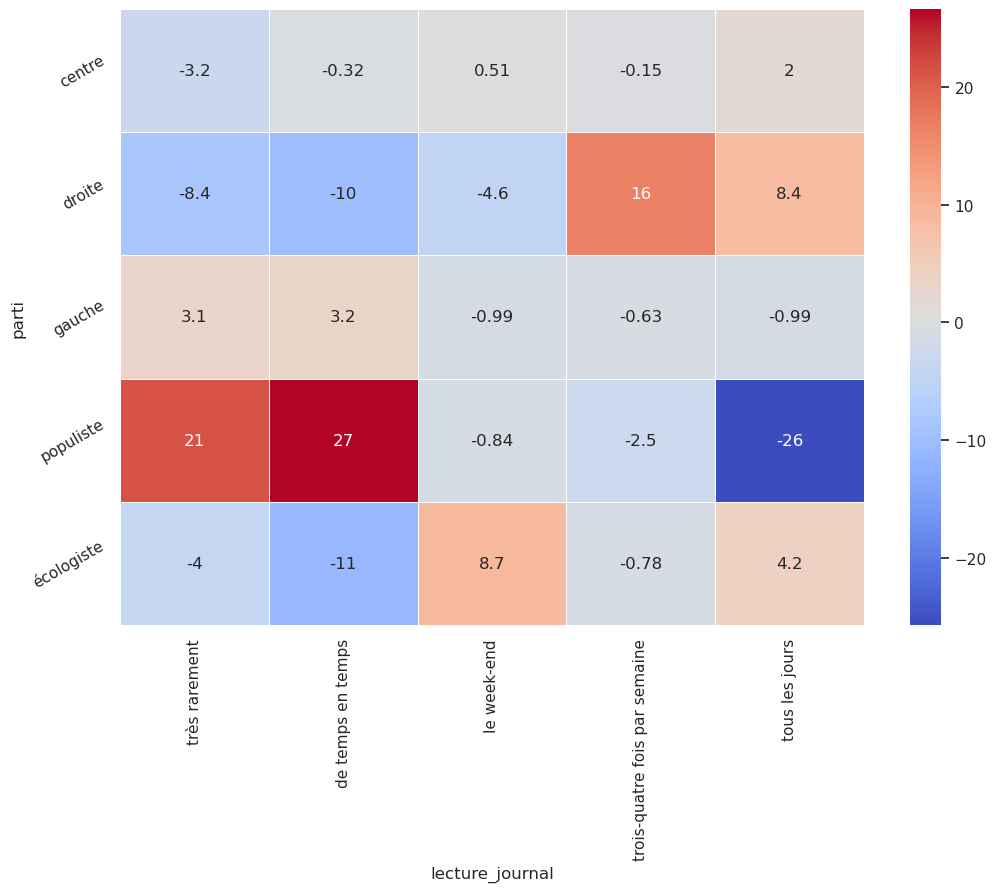

In [55]:
## Chi2 :somme des écarts pondérés

chi_2 = ecarts_ponderes.sum().sum() 
print(round(chi_2,3))


fig, ax = plt.subplots(figsize=(12,8))         
# Sample figsize in inches
g = sns.heatmap(ecarts_ponderes_sign, annot=ecarts_ponderes_sign, cmap="coolwarm", linewidths=.5, ax=ax)
labels = ecarts_ponderes.index

p = g.set_yticklabels(labels, rotation=30)

In [56]:
### Degrés d'indépendance
(len(ecarts_ponderes)-1) * (len(ecarts_ponderes.columns)-1), len(ecarts_ponderes),len(ecarts_ponderes.columns)

(16, 5, 5)

In [57]:
statistic, p, dof, expected = stats.chi2_contingency(c_obs_parti_lecture)

print(statistic, p, dof)

dfe = round(pd.DataFrame(expected),1)
dfe

169.01518926544836 2.4239025145180736e-23 25


,0,1,2,3,4,5
0,22.5,24.8,37.6,35.3,41.8,162.0
1,21.4,23.6,35.8,33.5,39.7,154.0
2,23.5,25.9,39.2,36.8,43.6,169.0
3,27.6,30.5,46.2,43.3,51.3,199.0
4,30.0,33.1,50.2,47.0,55.7,216.0
5,125.0,138.0,209.0,196.0,232.0,900.0


In [58]:
"({0:.30f})".format(2.4239025145180736e-23)

'(0.000000000000000000000024239025)'

### Rejet de l'hypothèse d'indépendance ?

Ce n'est pas possible dans ce cas:

* valeur critique 


* chi-2 = 
* P-value: 

... à reprendre

In [59]:
### Tables des proportions de contributions au chi-2
# cf. Benani, p.35

table = ecarts_ponderes/chi_2
table['total'] = table.sum(axis=1)
table.loc['total'] = table.sum(axis=0)
table

lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours,total
parti,,,,,,
centre,0.018999,0.001921,0.003017,0.000872,0.012096,0.036906
droite,0.049588,0.061081,0.026947,0.097113,0.049925,0.284654
gauche,0.018331,0.018852,0.005881,0.003711,0.005852,0.052627
populiste,0.127042,0.157350,0.004941,0.014590,0.151962,0.455886
écologiste,0.023864,0.065307,0.051229,0.004589,0.024940,0.169928
total,0.237824,0.304512,0.092014,0.120875,0.244776,1.000000


In [60]:
### % plus lisibles
rt = round(table*100,2)

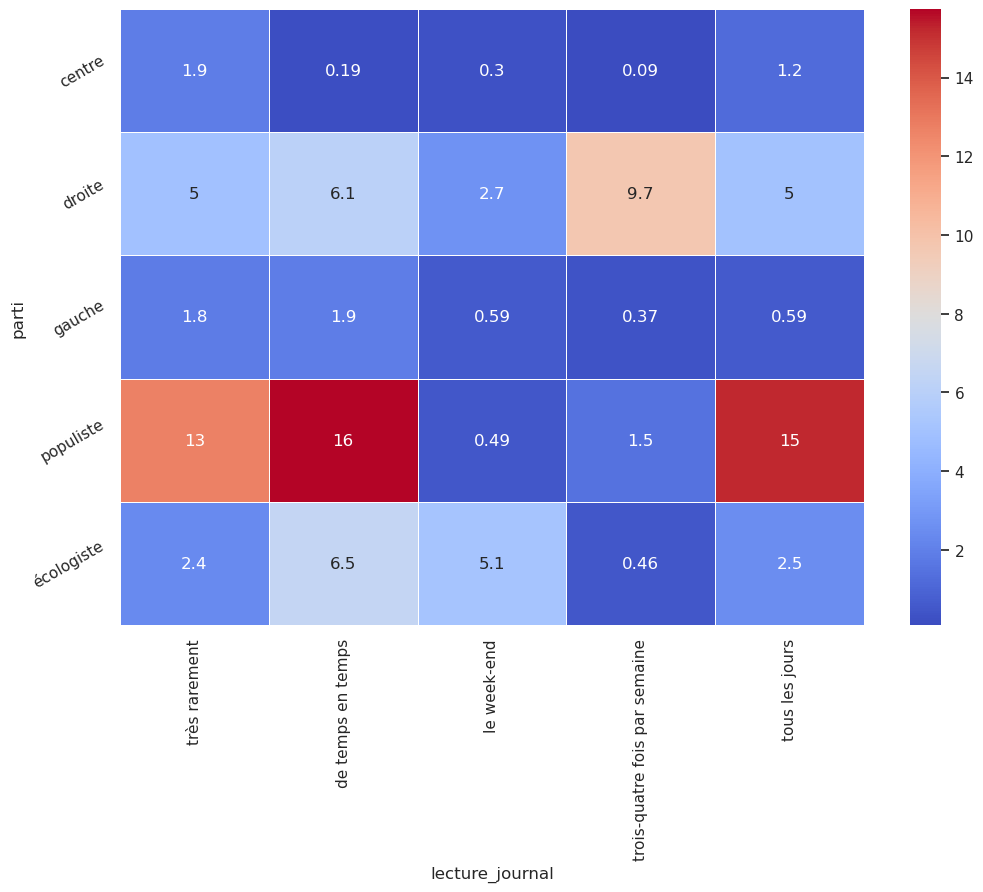

In [61]:
### Proportion des contributions au chi-2
tableau = rt.iloc[:-1,:-1]

fig, ax = plt.subplots(figsize=(12,8))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()